In [37]:
# 背包问题的剪枝与记忆化搜索优化
# 记忆化搜索使用的字典
memo = {}
def knapsack_recursive(index, capacity, current_value, weights, values):
    # 检查当前子问题是否已经计算过
    if (index, capacity) in memo:
        return memo[(index, capacity)]
    # 如果已经遍历完所有物品或者背包容量为0，返回当前价值
    if index >= len(weights) or capacity == 0:
        return current_value
    best_value = 0
    # 如果当前物品可以放入背包
    if capacity - weights[index] >= 0:
        # 计算剩余物品中最轻物品的重量
        min_weight_rest = min(weights[index + 1:]) if index + 1 < len(weights) else 0
        # 计算剩余物品的最大价值
        max_value_rest = sum(sorted(values[index + 1:], reverse=True))
        # 剪枝条件：如果放入当前物品后仍有可能得到更优解，则继续递归
        if capacity - weights[index] + min_weight_rest >= 0 and current_value + values[index] + max_value_rest > best_value:
            best_value = max(best_value, knapsack_recursive(index + 1, capacity - weights[index], current_value + values[index], weights, values))
    # 不放入当前物品，继续递归
    best_value = max(best_value, knapsack_recursive(index + 1, capacity, current_value, weights, values))
    # 记录当前子问题的解
    memo[(index, capacity)] = best_value
    return best_value

# 示例数据
weights = [1, 3, 4]
values = [15, 20, 30]
bag_capacity = 4
# 调用函数并输出结果
print(knapsack_recursive(0, bag_capacity, 0, weights, values))

35


Testing Knapsack size 5...
Testing Knapsack size 10...
Testing Knapsack size 15...
Testing Knapsack size 20...


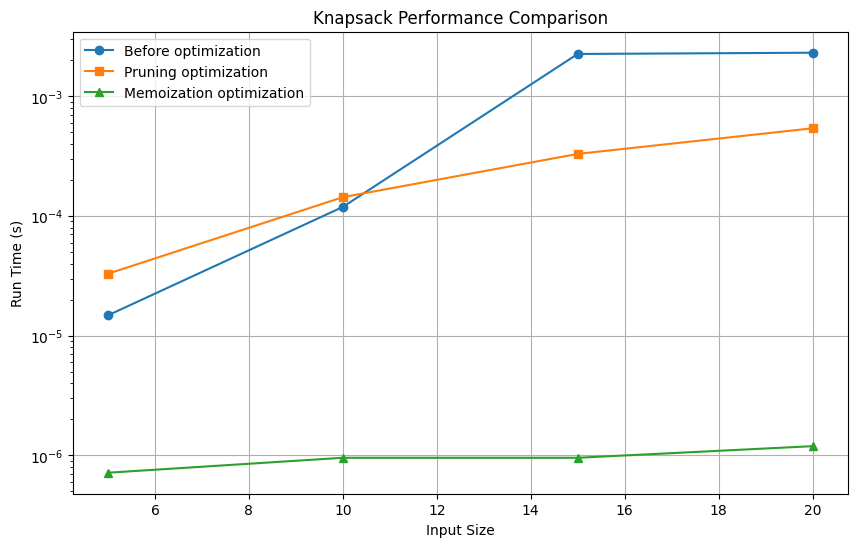

Testing LCS size 5...
Testing LCS size 8...
Testing LCS size 10...
Testing LCS size 12...


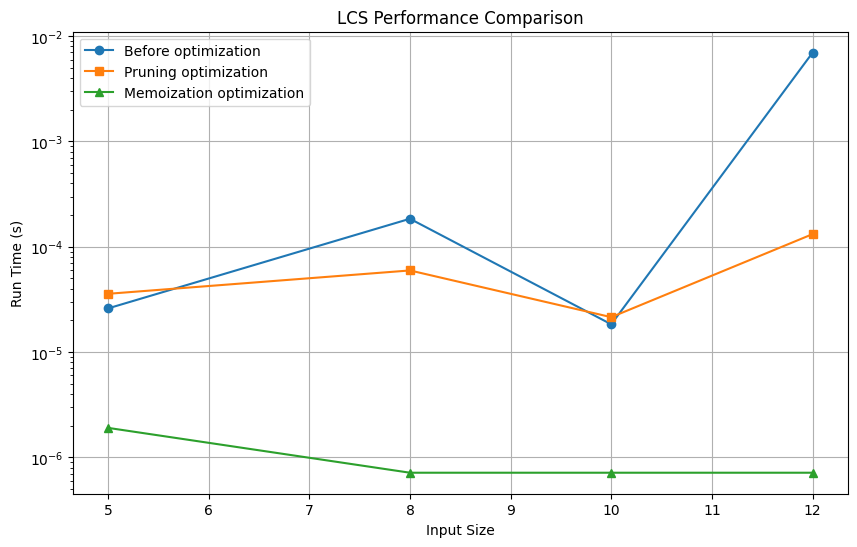

Testing LIS size 5...
Testing LIS size 10...
Testing LIS size 15...
Testing LIS size 20...


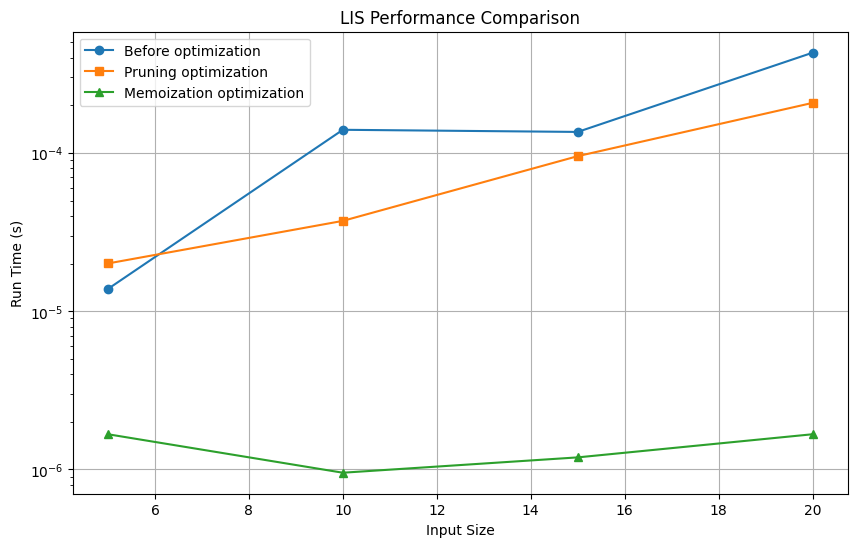

Testing Palindrome Partitioning size 5...
Testing Palindrome Partitioning size 10...
Testing Palindrome Partitioning size 15...
Testing Palindrome Partitioning size 20...


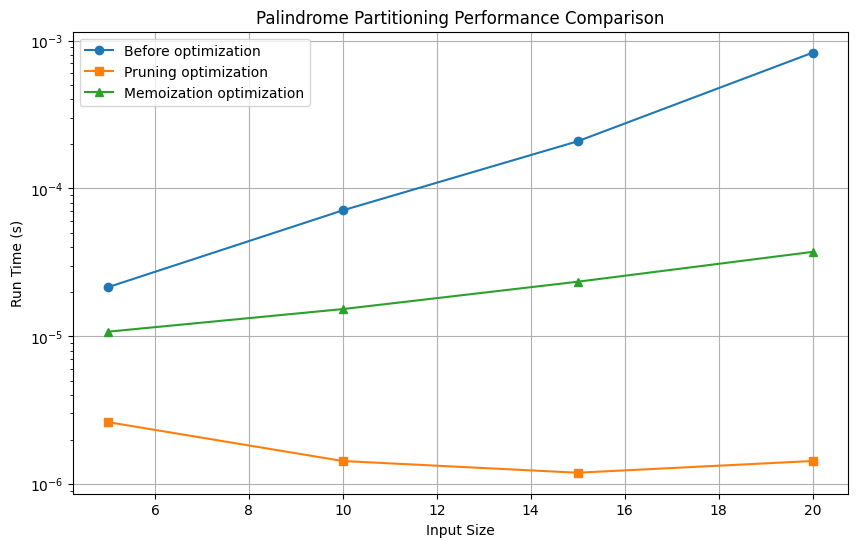

In [38]:
import time
import matplotlib.pyplot as plt
import random


# 背包问题
def knapsack_brute_force(index, capacity, weights, values):
    if index >= len(weights) or capacity == 0:
        return 0
    if weights[index] > capacity:
        return knapsack_brute_force(index + 1, capacity, weights, values)
    return max(
        knapsack_brute_force(index + 1, capacity, weights, values),
        values[index] + knapsack_brute_force(index + 1, capacity - weights[index], weights, values)
    )


memo_knapsack = {}


def knapsack_pruning(index, capacity, weights, values, current_value=0):
    if (index, capacity) in memo_knapsack:
        return memo_knapsack[(index, capacity)]
    if index >= len(weights) or capacity == 0:
        return current_value

    min_remaining_weight = min(weights[index:]) if index < len(weights) else 0
    if capacity < min_remaining_weight:
        return current_value

    take = 0
    if weights[index] <= capacity:
        take = knapsack_pruning(index + 1, capacity - weights[index],
                                weights, values, current_value + values[index])
    not_take = knapsack_pruning(index + 1, capacity, weights, values, current_value)

    memo_knapsack[(index, capacity)] = max(take, not_take)
    return memo_knapsack[(index, capacity)]


def knapsack_memoization(index, capacity, weights, values, current_value=0):
    if (index, capacity) in memo_knapsack:
        return memo_knapsack[(index, capacity)]
    if index >= len(weights) or capacity == 0:
        return current_value

    best_value = 0
    if weights[index] <= capacity:
        best_value = max(best_value, knapsack_memoization(index + 1, capacity - weights[index],
                                                         weights, values, current_value + values[index]))
    best_value = max(best_value, knapsack_memoization(index + 1, capacity, weights, values, current_value))

    memo_knapsack[(index, capacity)] = best_value
    return best_value


# 最长公共子序列
def lcs_brute(seq1, seq2, i, j):
    if i >= len(seq1) or j >= len(seq2):
        return 0
    if seq1[i] == seq2[j]:
        return 1 + lcs_brute(seq1, seq2, i + 1, j + 1)
    return max(lcs_brute(seq1, seq2, i + 1, j), lcs_brute(seq1, seq2, i, j + 1))


memo_lcs = {}


def lcs_pruning(seq1, seq2, i, j):
    if (i, j) in memo_lcs:
        return memo_lcs[(i, j)]
    if i >= len(seq1) or j >= len(seq2):
        return 0

    if len(seq1) - i + len(seq2) - j <= max(memo_lcs.values()) if memo_lcs else 0:
        return max(memo_lcs.values()) if memo_lcs else 0

    if seq1[i] == seq2[j]:
        memo_lcs[(i, j)] = 1 + lcs_pruning(seq1, seq2, i + 1, j + 1)
    else:
        memo_lcs[(i, j)] = max(
            lcs_pruning(seq1, seq2, i + 1, j),
            lcs_pruning(seq1, seq2, i, j + 1)
        )
    return memo_lcs[(i, j)]


def lcs_memoization(seq1, seq2, i, j):
    if (i, j) in memo_lcs:
        return memo_lcs[(i, j)]
    if i >= len(seq1) or j >= len(seq2):
        return 0

    if seq1[i] == seq2[j]:
        memo_lcs[(i, j)] = 1 + lcs_memoization(seq1, seq2, i + 1, j + 1)
    else:
        memo_lcs[(i, j)] = max(
            lcs_memoization(seq1, seq2, i + 1, j),
            lcs_memoization(seq1, seq2, i, j + 1)
        )
    return memo_lcs[(i, j)]


# 最长递增子序列
def lis_brute(nums, index, last):
    if index >= len(nums):
        return 0
    take = 0
    if nums[index] > last:
        take = 1 + lis_brute(nums, index + 1, nums[index])
    not_take = lis_brute(nums, index + 1, last)
    return max(take, not_take)


memo_lis = {}


def lis_pruning(nums, index, last):
    if index >= len(nums):
        return 0
    if (index, last) in memo_lis:
        return memo_lis[(index, last)]

    if nums[index] <= last and len(memo_lis.values()) + len(nums) - index <= max(memo_lis.values()) if memo_lis else 0:
        return max(memo_lis.values()) if memo_lis else 0

    if nums[index] <= last:
        memo_lis[(index, last)] = lis_pruning(nums, index + 1, last)
    else:
        memo_lis[(index, last)] = max(
            1 + lis_pruning(nums, index + 1, nums[index]),
            lis_pruning(nums, index + 1, last)
        )
    return memo_lis[(index, last)]


def lis_memoization(nums, index, last):
    if index >= len(nums):
        return 0
    if (index, last) in memo_lis:
        return memo_lis[(index, last)]

    if nums[index] <= last:
        memo_lis[(index, last)] = lis_memoization(nums, index + 1, last)
    else:
        memo_lis[(index, last)] = max(
            1 + lis_memoization(nums, index + 1, nums[index]),
            lis_memoization(nums, index + 1, last)
        )
    return memo_lis[(index, last)]


# 回文分割
def is_palindrome(s, start, end):
    while start < end:
        if s[start] != s[end]:
            return False
        start += 1
        end -= 1
    return True


def palindrome_partitioning_brute(s, start):
    if start == len(s):
        return 0
    min_cuts = float('inf')
    for end in range(start, len(s)):
        if is_palindrome(s, start, end):
            cuts = 1 + palindrome_partitioning_brute(s, end + 1)
            min_cuts = min(min_cuts, cuts)
    return min_cuts


memo_palindrome = {}


def palindrome_partitioning_pruning(s, start):
    if start == len(s):
        return 0
    if start in memo_palindrome:
        return memo_palindrome[start]

    if len(s) - start < min(memo_palindrome.values()) if memo_palindrome else float('inf'):
        return min(memo_palindrome.values()) if memo_palindrome else float('inf')

    min_cuts = float('inf')
    for end in range(start, len(s)):
        if is_palindrome(s, start, end):
            cuts = 1 + palindrome_partitioning_pruning(s, end + 1)
            min_cuts = min(min_cuts, cuts)
    memo_palindrome[start] = min_cuts
    return min_cuts


def palindrome_partitioning_memoization(s, start):
    if start == len(s):
        return 0
    if start in memo_palindrome:
        return memo_palindrome[start]

    min_cuts = float('inf')
    for end in range(start, len(s)):
        if is_palindrome(s, start, end):
            cuts = 1 + palindrome_partitioning_memoization(s, end + 1)
            min_cuts = min(min_cuts, cuts)
    memo_palindrome[start] = min_cuts
    return min_cuts


# 性能测试工具
def performance_test(problem_name, brute_func, pruning_func, memoization_func, data_generator, fixed_args=()):
    problem_sizes = {
        "Knapsack": [5, 10, 15, 20],
        "LCS": [5, 8, 10, 12],
        "LIS": [5, 10, 15, 20],
        "Palindrome Partitioning": [5, 10, 15, 20]
    }
    sizes = problem_sizes[problem_name]

    brute_times = []
    pruning_times = []
    memoization_times = []

    for size in sizes:
        print(f"Testing {problem_name} size {size}...")
        data = data_generator(size)

        # Clear memoization
        if problem_name == "Knapsack":
            memo_knapsack.clear()
        elif problem_name == "LCS":
            memo_lcs.clear()
        elif problem_name == "LIS":
            memo_lis.clear()
        elif problem_name == "Palindrome Partitioning":
            memo_palindrome.clear()

        # Test brute force
        start = time.time()
        brute_func(*fixed_args, *data)
        brute_times.append(time.time() - start)

        # Test pruning
        start = time.time()
        pruning_func(*fixed_args, *data)
        pruning_times.append(time.time() - start)

        # Test memoization
        start = time.time()
        memoization_func(*fixed_args, *data)
        memoization_times.append(time.time() - start)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, brute_times, marker='o', label='Before optimization')
    plt.plot(sizes, pruning_times, marker='s', label='Pruning optimization')
    plt.plot(sizes, memoization_times, marker='^', label='Memoization optimization')
    plt.title(f"{problem_name} Performance Comparison")
    plt.xlabel("Input Size")
    plt.ylabel("Run Time (s)")
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()


# 数据生成器
def gen_knapsack(n):
    return (random.randint(10, 50),
            [random.randint(1, 20) for _ in range(n)],
            [random.randint(1, 30) for _ in range(n)])


def gen_lcs(n):
    return (''.join(random.choices('ACGT', k=n)),
            ''.join(random.choices('ACGT', k=n)))


def gen_lis(n):
    return ([random.randint(0, 100) for _ in range(n)],)


def gen_palindrome(n):
    return (''.join(random.choices('abc', k=n)),)

# 主程序
if __name__ == "__main__":
    # 背包问题测试
    performance_test("Knapsack",
                     knapsack_brute_force,
                     knapsack_pruning,
                     knapsack_memoization,
                     gen_knapsack,
                     fixed_args=(0,))

    # 最长公共子序列测试
    performance_test("LCS",
                     lambda s1, s2: lcs_brute(s1, s2, 0, 0),
                     lambda s1, s2: lcs_pruning(s1, s2, 0, 0),
                     lambda s1, s2: lcs_memoization(s1, s2, 0, 0),
                     gen_lcs)

    # 最长递增子序列测试
    performance_test("LIS",
                     lambda nums: lis_brute(nums, 0, -float('inf')),
                     lambda nums: lis_pruning(nums, 0, -float('inf')),
                     lambda nums: lis_memoization(nums, 0, -float('inf')),
                     gen_lis)

    # 回文分割测试
    performance_test("Palindrome Partitioning",
                     lambda s: palindrome_partitioning_brute(s, 0),
                     lambda s: palindrome_partitioning_pruning(s, 0),
                     lambda s: palindrome_partitioning_memoization(s, 0),
                     gen_palindrome)